In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#from umap import UMAP
from scipy.stats import norm
from sklearn.datasets import make_multilabel_classification
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [28]:
file_path_features = '../Data/final_features.csv'
file_path_echonest = '../Data/final_echonest_features.csv'

# Read the data file with the specified column headers
df = pd.read_csv(file_path_features)

df.head()

chroma_cens_kurtosis_01  chroma_cens_kurtosis_02  chroma_cens_kurtosis_03  \
0                 7.180653                 5.230309                 0.249321   
1                 1.888963                 0.760539                 0.345297   
2                 0.527563                -0.077654                -0.279610   
3                 3.702245                -0.291193                 2.196742   
4                -0.193837                -0.198527                 0.201546   

   chroma_cens_kurtosis_04  chroma_cens_kurtosis_05  chroma_cens_kurtosis_06  \
0                 1.347620                 1.482478                 0.531371   
1                 2.295201                 1.654031                 0.067592   
2                 0.685883                 1.937570                 0.880839   
3                -0.234449                 1.367364                 0.998411   
4                 0.258556                 0.775204                 0.084794   

   chroma_cens_kurtosis_07  chroma_cens_kurtosis_08  chroma_cens_kurtosis_09  \
0                 1.481593                 2.691455                 0.866868   
1                 1.366848                 1.054094                 0.108103   
2                -0.923192                -0.927232                 0.666617   
3                 1.770694                 1.604566                 0.521217   
4                -0.289294                -0.816410                 0.043851   

   chroma_cens_kurtosis_10  ...  tonnetz_std_04  tonnetz_std_05  \
0                 1.341231  ...        0.054125        0.012226   
1                 0.619185  ...        0.063831        0.014212   
2                 1.038546  ...        0.040730        0.012691   
3                 1.982386  ...        0.074358        0.017952   
4                -0.804761  ...        0.095003        0.022492   

   tonnetz_std_06  zcr_kurtosis_01  zcr_max_01  zcr_mean_01  zcr_median_01  \
0        0.012111         5.758890    0.459473     0.085629       0.071289   
1        0.017740         2.824694    0.466309     0.084578       0.063965   
2        0.014759         6.808415    0.375000     0.053114       0.041504   
3        0.013921        21.434212    0.452148     0.077515       0.071777   
4        0.021355        16.669037    0.469727     0.047225       0.040039   

   zcr_min_01  zcr_skew_01  zcr_std_01  
0    0.000000     2.089872    0.061448  
1    0.000000     1.716724    0.069330  
2    0.000000     2.193303    0.044861  
3    0.000000     3.542325    0.040800  
4    0.000977     3.189831    0.030993  

[5 rows x 518 columns]

In [3]:
df.shape

(106574, 518)

In [4]:
df.isna().sum()

chroma_cens_kurtosis_01    0
chroma_cens_kurtosis_02    0
chroma_cens_kurtosis_03    0
chroma_cens_kurtosis_04    0
chroma_cens_kurtosis_05    0
                          ..
zcr_mean_01                0
zcr_median_01              0
zcr_min_01                 0
zcr_skew_01                0
zcr_std_01                 0
Length: 518, dtype: int64

In [5]:
# Check for missing values in each column
missing_values_per_column = df.isna().sum()

# Check if any column has missing values
any_missing_values = missing_values_per_column.any()

if any_missing_values:
    print("Some columns have missing values.")
else:
    print("No columns have missing values.")


No columns have missing values.


In [6]:
df.describe()

chroma_cens_kurtosis_01  chroma_cens_kurtosis_02  \
count            106574.000000            106574.000000   
mean                  0.439999                 0.199756   
std                  32.285524                11.120903   
min                  -1.955806                -1.936607   
25%                  -0.636597                -0.665684   
50%                  -0.176557                -0.221131   
75%                   0.485000                 0.410097   
max                8843.367188              2864.075195   

       chroma_cens_kurtosis_03  chroma_cens_kurtosis_04  \
count            106574.000000            106574.000000   
mean                  0.334683                 0.270263   
std                   9.980692                19.074557   
min                  -1.967450                -3.000000   
25%                  -0.629114                -0.644747   
50%                  -0.152708                -0.191032   
75%                   0.529836                 0.446800   
max                1777.615967              4257.045898   

       chroma_cens_kurtosis_05  chroma_cens_kurtosis_06  \
count            106574.000000            106574.000000   
mean                  0.294806                 0.315635   
std                  15.025603                12.176182   
min                  -1.921206                -1.923740   
25%                  -0.656779                -0.622579   
50%                  -0.198025                -0.152089   
75%                   0.452680                 0.513112   
max                3188.034424              2809.779297   

       chroma_cens_kurtosis_07  chroma_cens_kurtosis_08  \
count            106574.000000            106574.000000   
mean                  0.273511                 0.334927   
std                  16.975991                15.486402   
min                  -1.935382                -3.000000   
25%                  -0.646798                -0.635741   
50%                  -0.187959                -0.161478   
75%                   0.472161                 0.525814   
max                4281.090820              3869.482178   

       chroma_cens_kurtosis_09  chroma_cens_kurtosis_10  ...  tonnetz_std_04  \
count            106574.000000            106574.000000  ...   106574.000000   
mean                  0.201939                 0.285631  ...        0.098667   
std                   7.364308                 8.175257  ...        0.037101   
min                  -3.000000                -3.000000  ...        0.005681   
25%                  -0.667799                -0.660292  ...        0.071240   
50%                  -0.214547                -0.181836  ...        0.093500   
75%                   0.432480                 0.495568  ...        0.121007   
max                1217.209473              1772.918213  ...        0.332470   

       tonnetz_std_05  tonnetz_std_06  zcr_kurtosis_01     zcr_max_01  \
count   106574.000000   106574.000000    106574.000000  106574.000000   
mean         0.021569        0.021880        29.464638       0.381368   
std          0.006076        0.006125        88.975395       0.183414   
min          0.000087        0.000368        -1.967539       0.010254   
25%          0.017226        0.017542         3.316640       0.246582   
50%          0.020636        0.020964         9.714652       0.357910   
75%          0.024990        0.025252        26.981386       0.471680   
max          0.092869        0.116128      8438.014648       0.999512   

         zcr_mean_01  zcr_median_01     zcr_min_01    zcr_skew_01  \
count  106574.000000  106574.000000  106574.000000  106574.000000   
mean        0.052755       0.043576       0.002342       3.214247   
std         0.032634       0.031703       0.005152       3.045345   
min         0.000055       0.000000       0.000000     -15.727972   
25%         0.032913       0.024902       0.000000       1.400700   
50%         0.047077       0.037598       0.000000       2.404834   
75%         0.064

In [7]:
# Print the names of the first 50 columns
print(df.columns[:50].tolist())


['chroma_cens_kurtosis_01', 'chroma_cens_kurtosis_02', 'chroma_cens_kurtosis_03', 'chroma_cens_kurtosis_04', 'chroma_cens_kurtosis_05', 'chroma_cens_kurtosis_06', 'chroma_cens_kurtosis_07', 'chroma_cens_kurtosis_08', 'chroma_cens_kurtosis_09', 'chroma_cens_kurtosis_10', 'chroma_cens_kurtosis_11', 'chroma_cens_kurtosis_12', 'chroma_cens_max_01', 'chroma_cens_max_02', 'chroma_cens_max_03', 'chroma_cens_max_04', 'chroma_cens_max_05', 'chroma_cens_max_06', 'chroma_cens_max_07', 'chroma_cens_max_08', 'chroma_cens_max_09', 'chroma_cens_max_10', 'chroma_cens_max_11', 'chroma_cens_max_12', 'chroma_cens_mean_01', 'chroma_cens_mean_02', 'chroma_cens_mean_03', 'chroma_cens_mean_04', 'chroma_cens_mean_05', 'chroma_cens_mean_06', 'chroma_cens_mean_07', 'chroma_cens_mean_08', 'chroma_cens_mean_09', 'chroma_cens_mean_10', 'chroma_cens_mean_11', 'chroma_cens_mean_12', 'chroma_cens_median_01', 'chroma_cens_median_02', 'chroma_cens_median_03', 'chroma_cens_median_04', 'chroma_cens_median_05', 'chroma_ce

In [8]:
# Print the names of columns containing "-01"
columns_with_01 = [col_name for col_name in df.columns if "_01" in col_name]
print(columns_with_01)


['chroma_cens_kurtosis_01', 'chroma_cens_max_01', 'chroma_cens_mean_01', 'chroma_cens_median_01', 'chroma_cens_min_01', 'chroma_cens_skew_01', 'chroma_cens_std_01', 'chroma_cqt_kurtosis_01', 'chroma_cqt_max_01', 'chroma_cqt_mean_01', 'chroma_cqt_median_01', 'chroma_cqt_min_01', 'chroma_cqt_skew_01', 'chroma_cqt_std_01', 'chroma_stft_kurtosis_01', 'chroma_stft_max_01', 'chroma_stft_mean_01', 'chroma_stft_median_01', 'chroma_stft_min_01', 'chroma_stft_skew_01', 'chroma_stft_std_01', 'mfcc_kurtosis_01', 'mfcc_max_01', 'mfcc_mean_01', 'mfcc_median_01', 'mfcc_min_01', 'mfcc_skew_01', 'mfcc_std_01', 'rmse_kurtosis_01', 'rmse_max_01', 'rmse_mean_01', 'rmse_median_01', 'rmse_min_01', 'rmse_skew_01', 'rmse_std_01', 'spectral_bandwidth_kurtosis_01', 'spectral_bandwidth_max_01', 'spectral_bandwidth_mean_01', 'spectral_bandwidth_median_01', 'spectral_bandwidth_min_01', 'spectral_bandwidth_skew_01', 'spectral_bandwidth_std_01', 'spectral_centroid_kurtosis_01', 'spectral_centroid_max_01', 'spectral_

## EDA

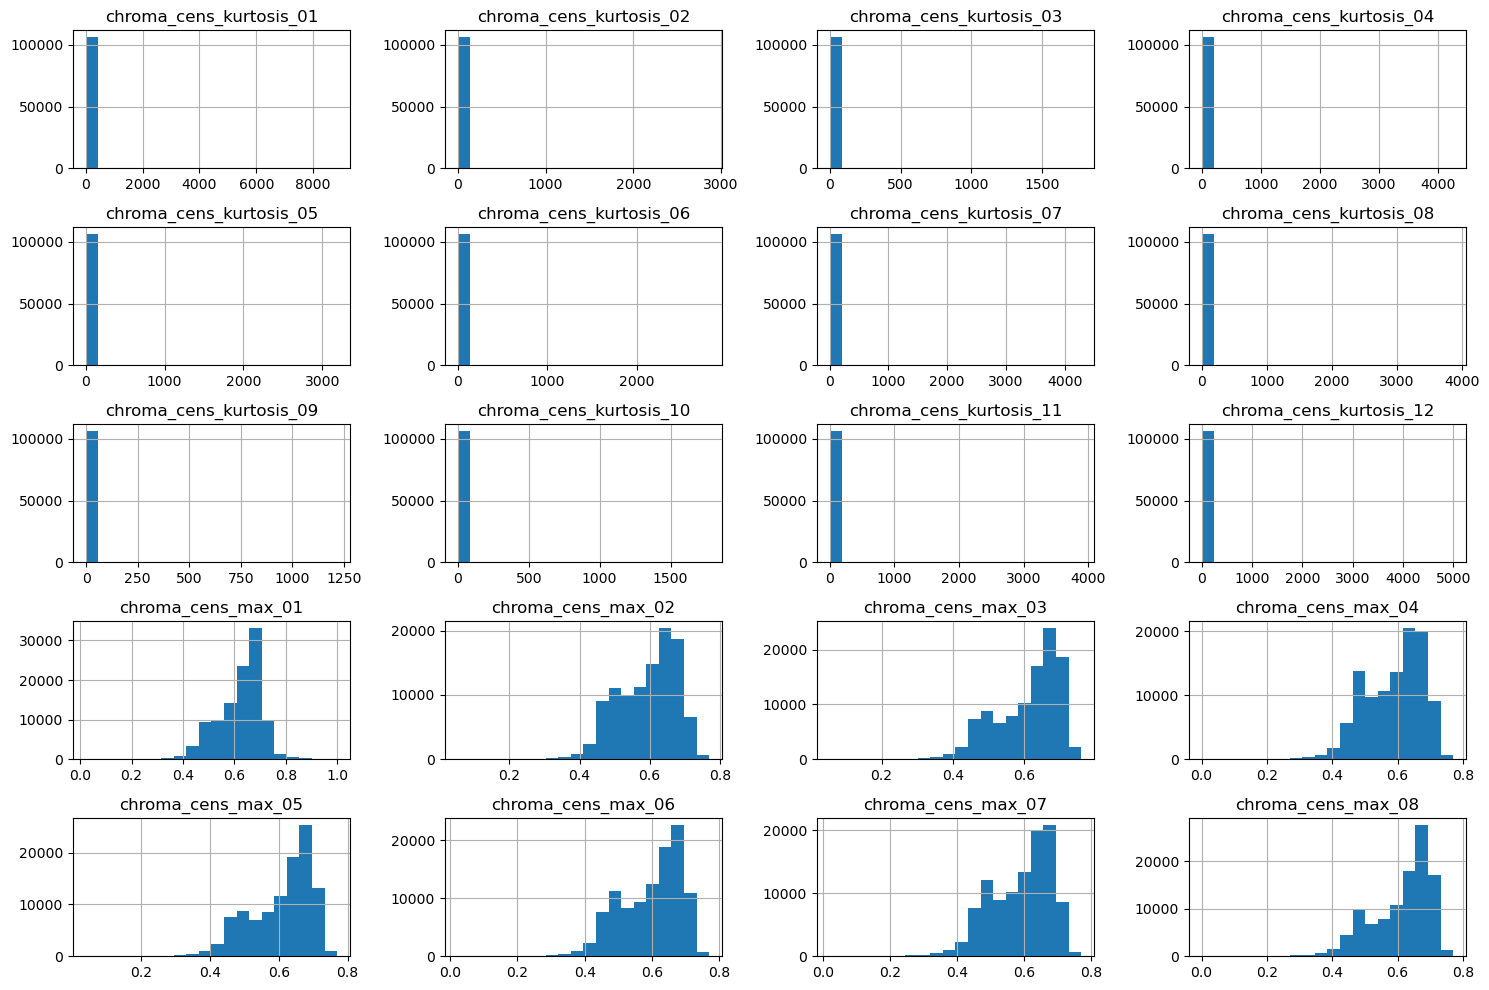

In [9]:
import matplotlib.pyplot as plt

# Plot histograms for the first 20 columns
df.iloc[:, :20].hist(bins=20, figsize=(15, 10))
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


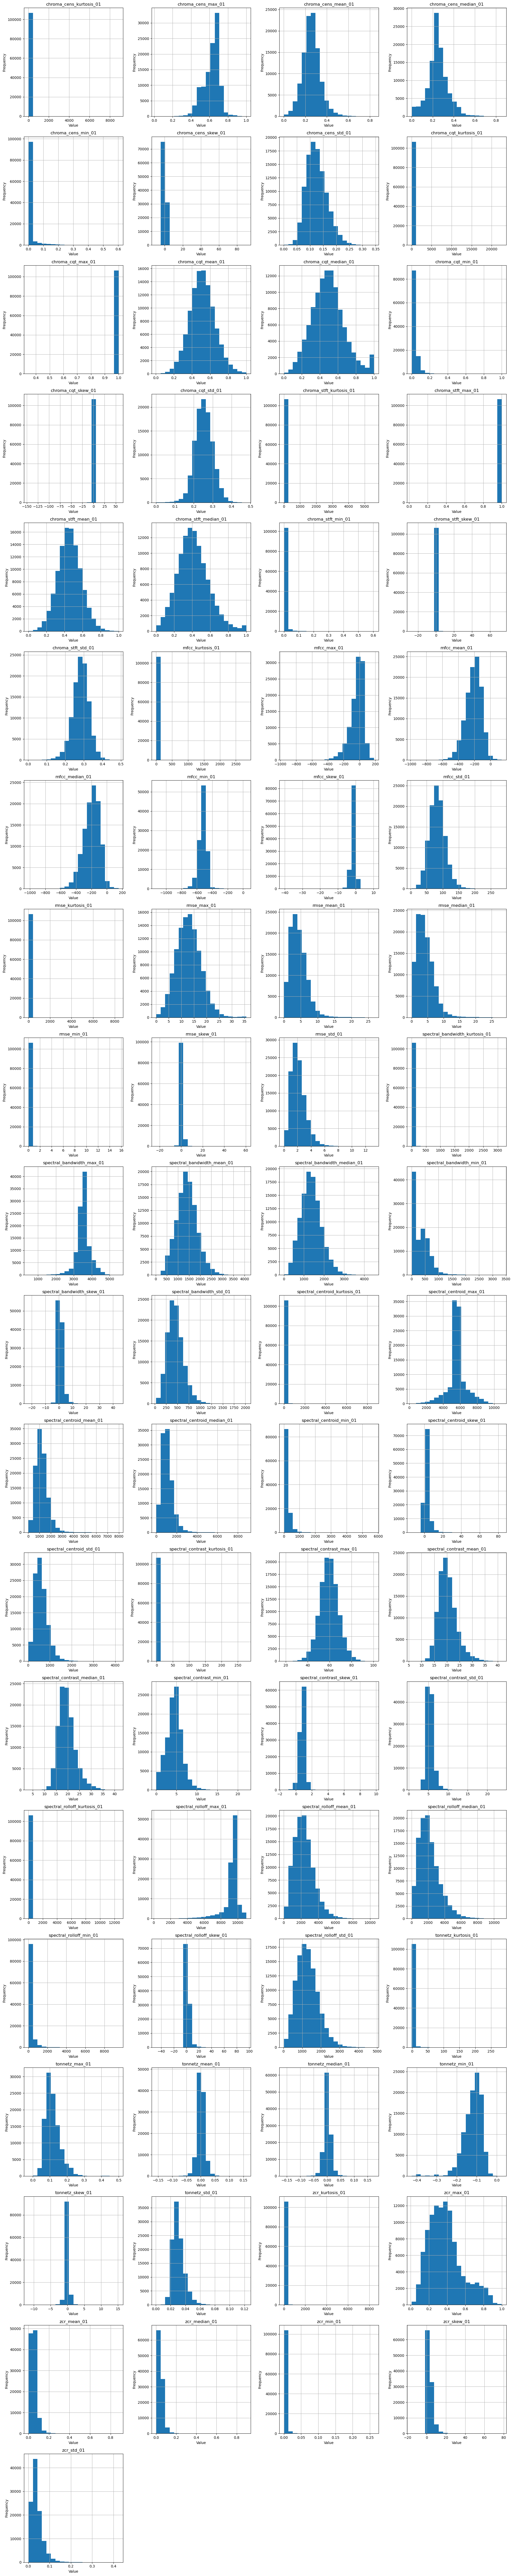

In [10]:
import matplotlib.pyplot as plt

# Subset the DataFrame to include only columns with "-01" in their names
subset_df = df[columns_with_01]

# Calculate the number of rows needed
num_cols = len(columns_with_01)
num_rows = (num_cols + 3) // 4  # Ceiling division to ensure enough rows

# Create subplots with 4 histograms per row
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5*num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot histograms for each column containing "-01"
for i, (col, ax) in enumerate(zip(subset_df.columns, axes)):
    subset_df[col].hist(ax=ax, bins=20)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for ax in axes[num_cols:]:
    ax.remove()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


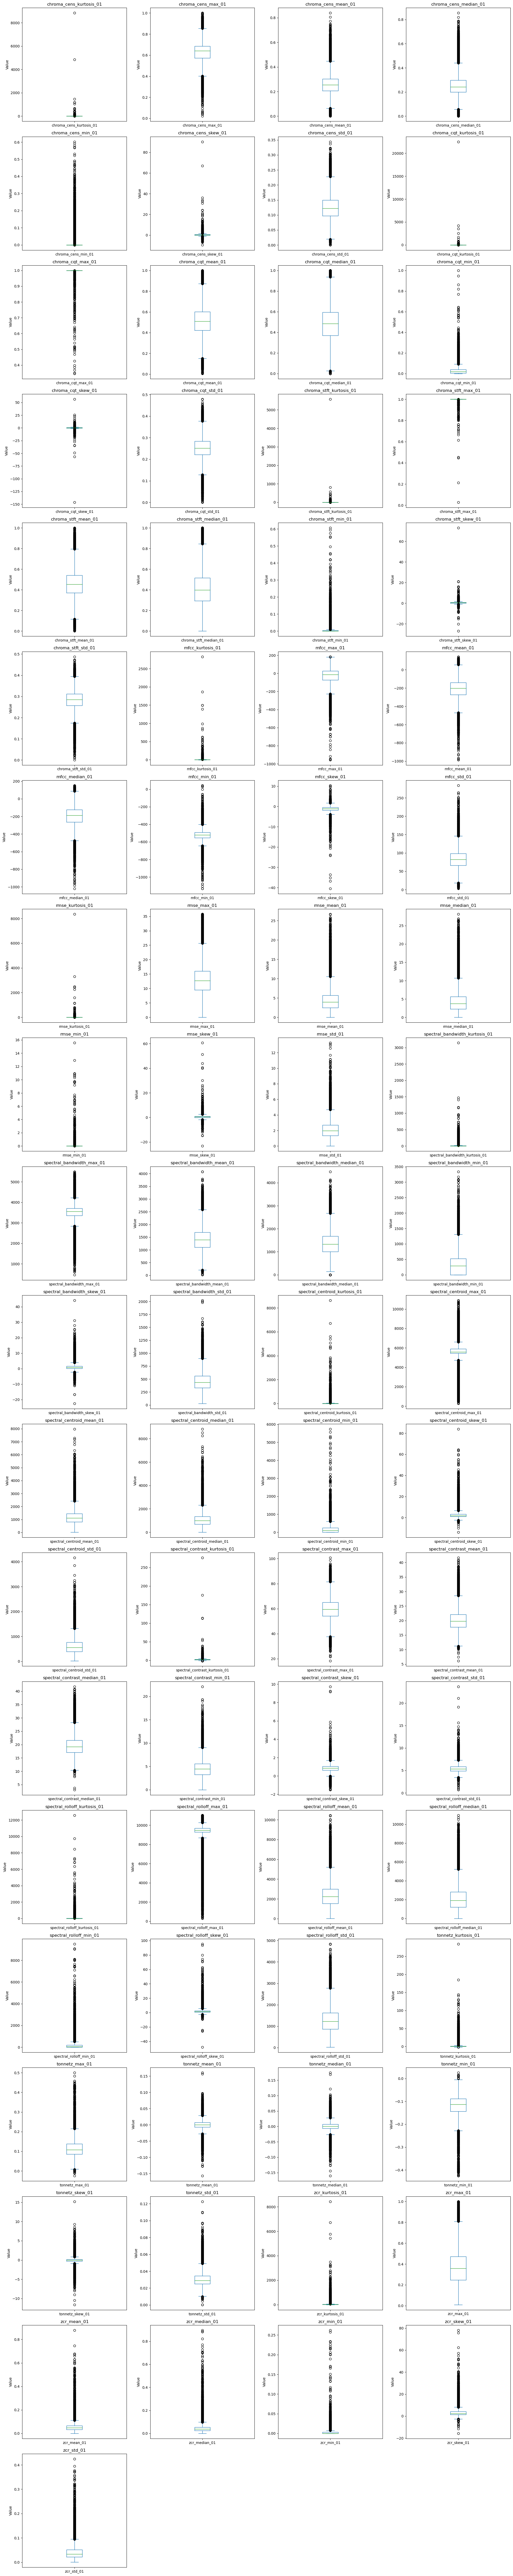

In [11]:
# Create subplots with 4 boxplots per row
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5*num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot boxplots for each column containing "-01"
for i, (col, ax) in enumerate(zip(subset_df.columns, axes)):
    subset_df[col].plot(kind='box', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Value')

# Remove any unused subplots
for ax in axes[num_cols:]:
    ax.remove()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

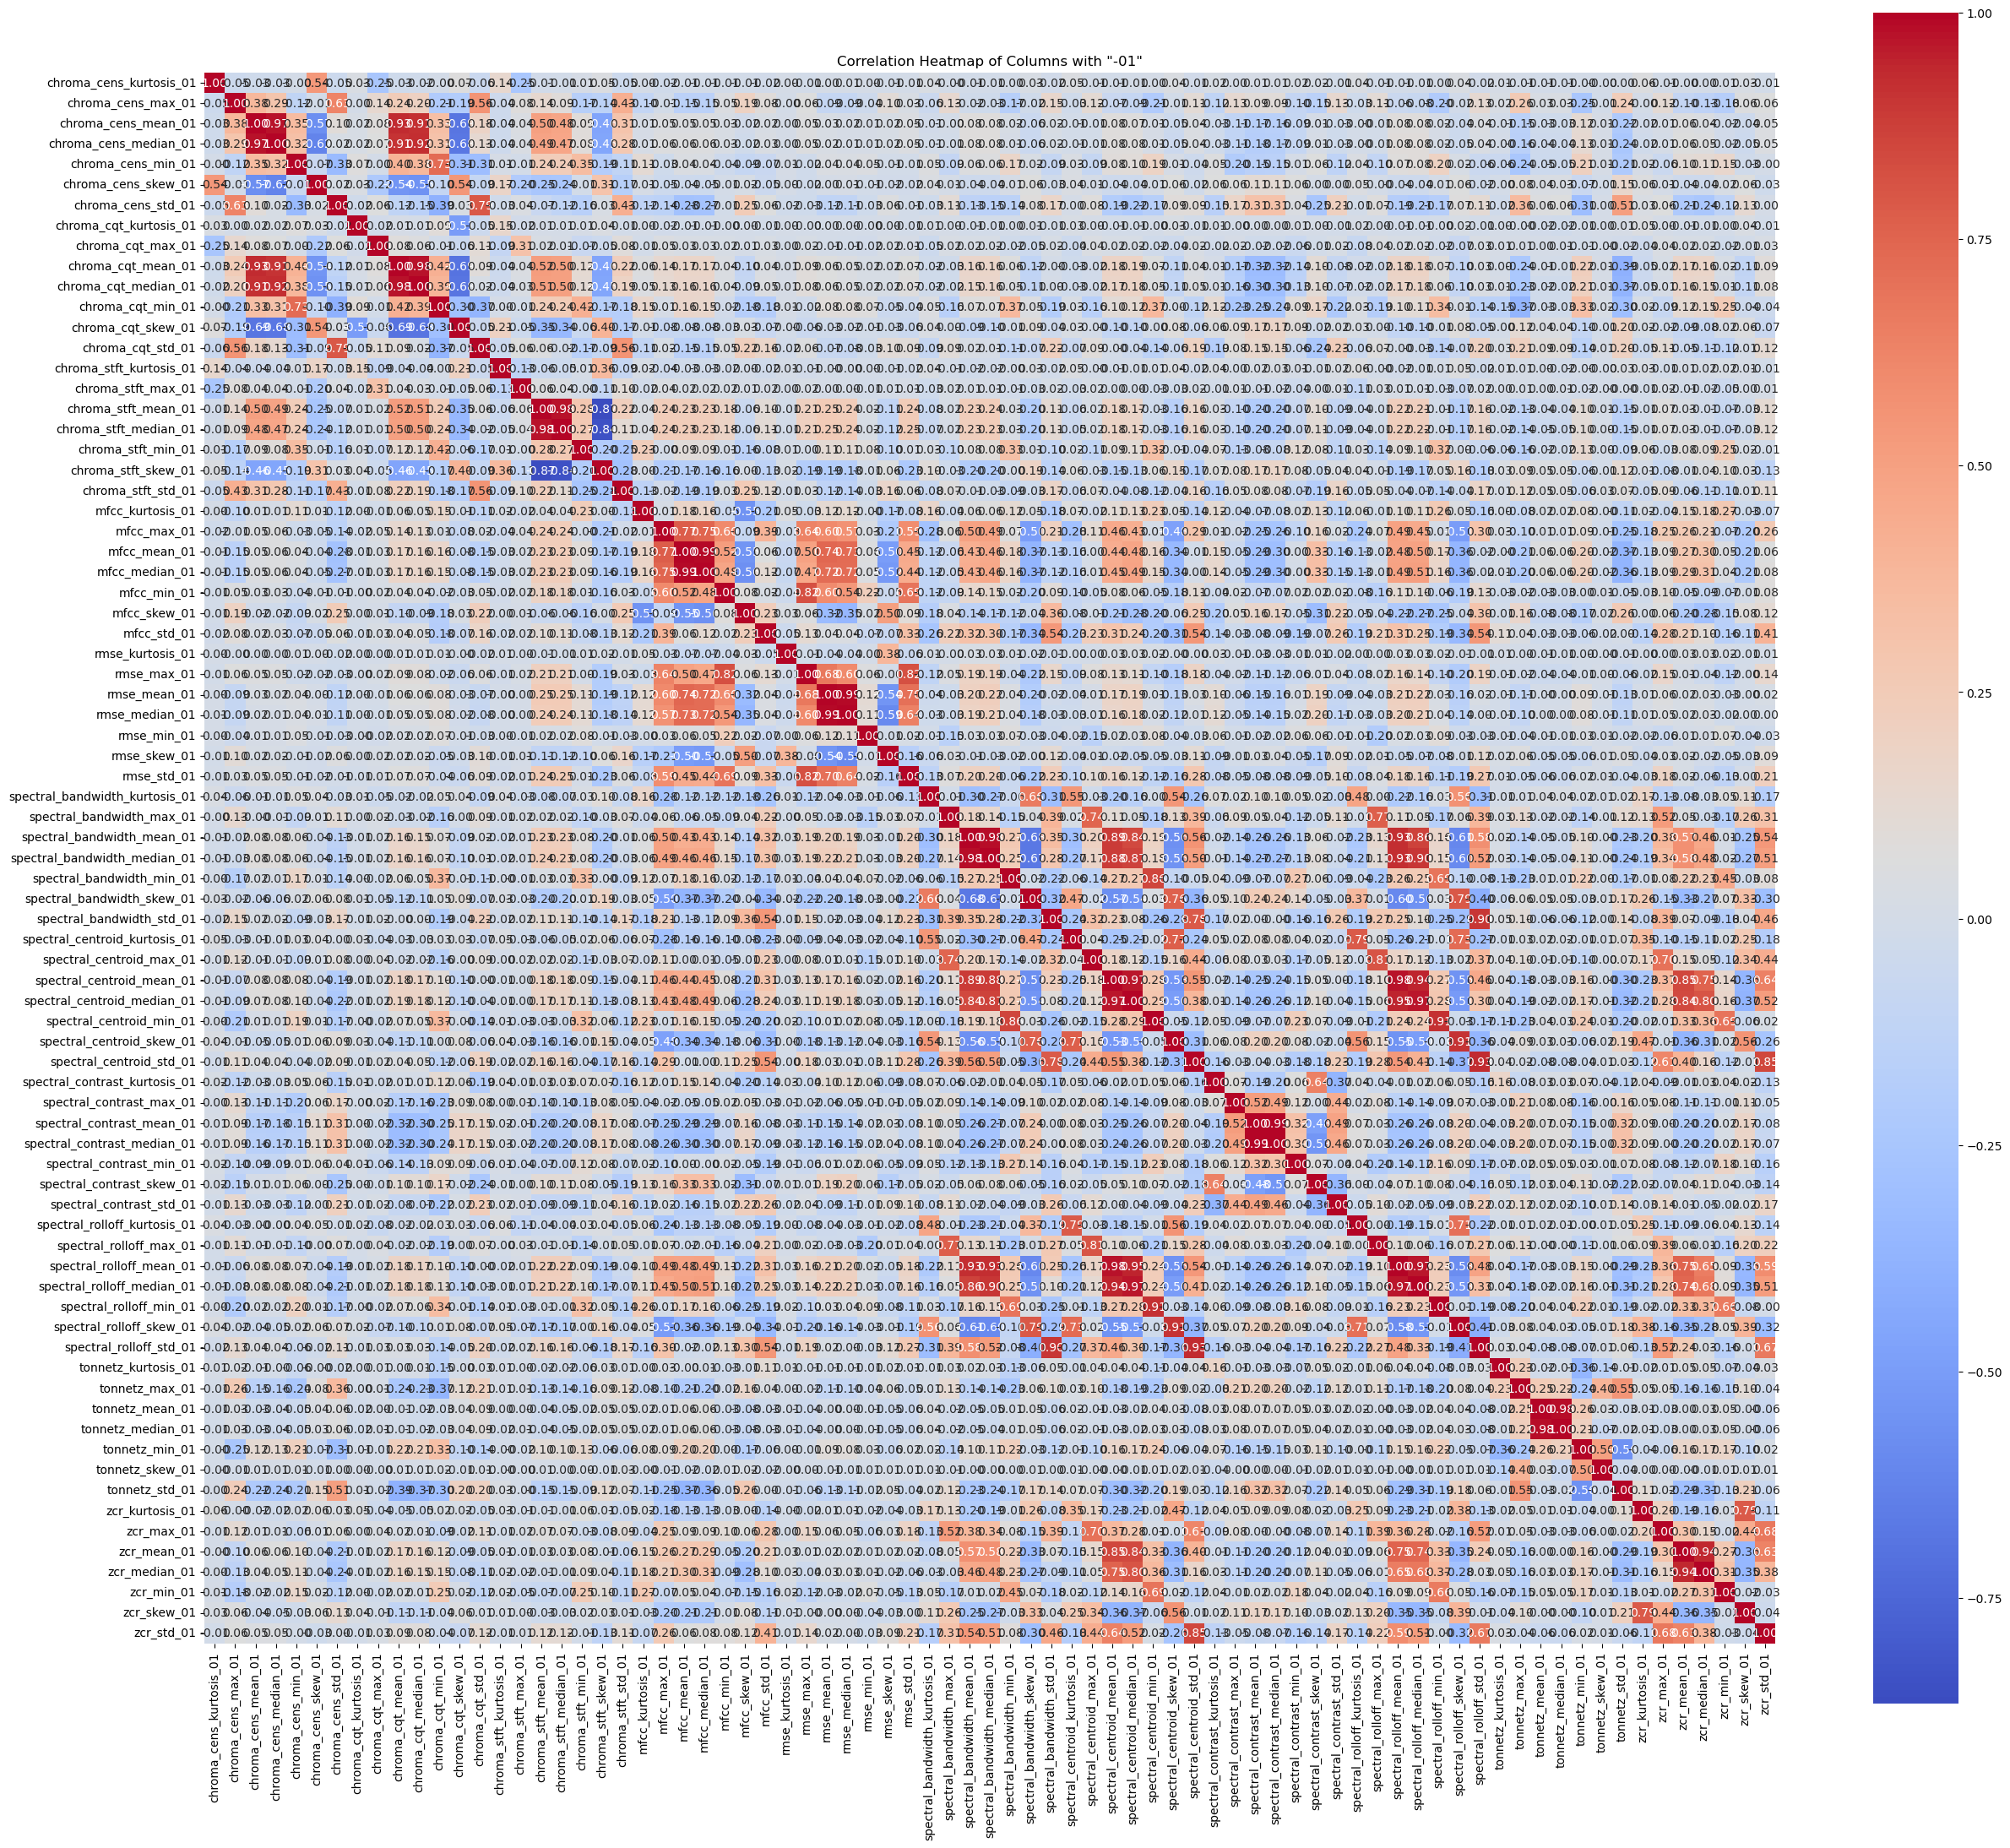

In [12]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(30, 26))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Columns with "-01"')
plt.show()


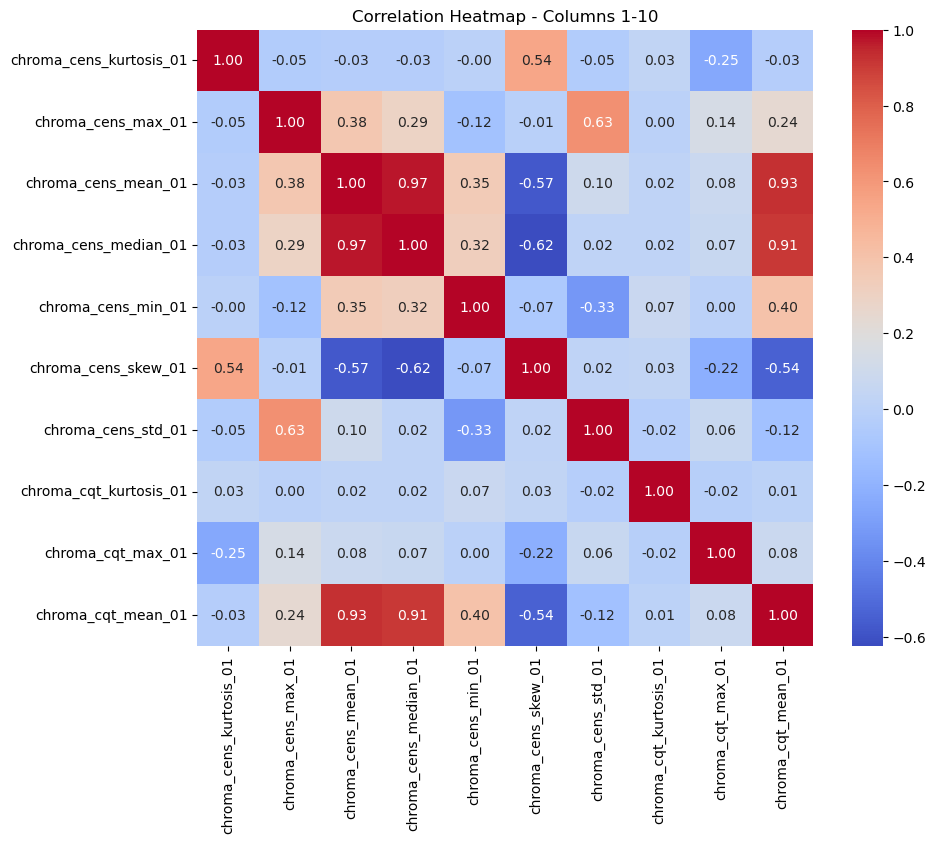

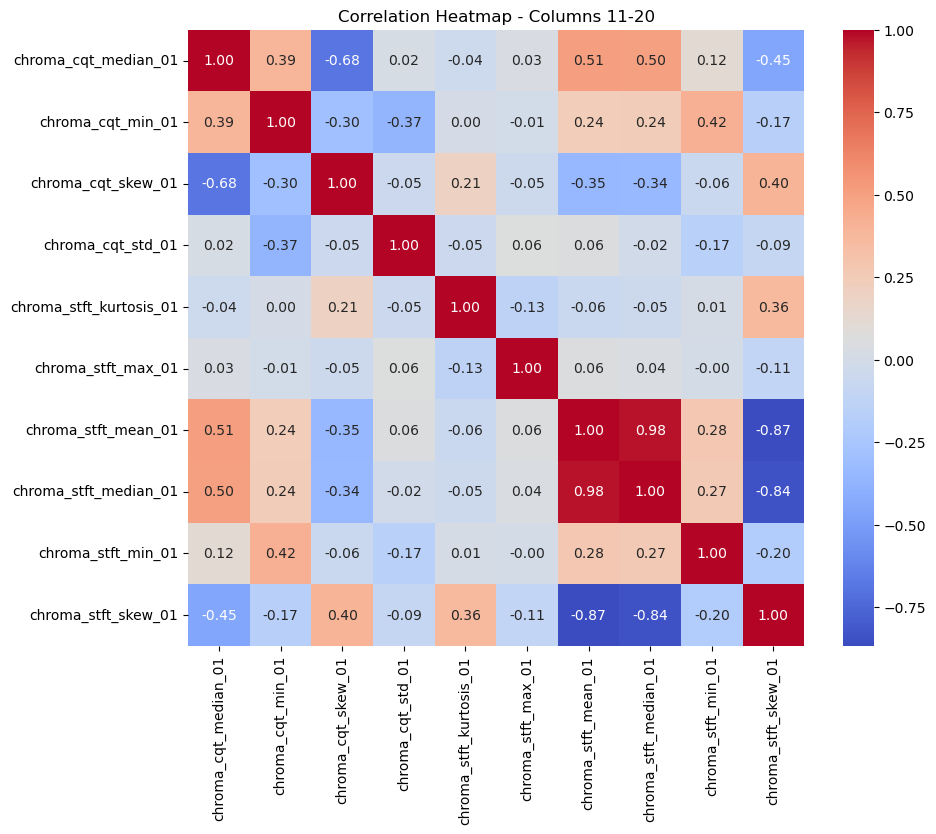

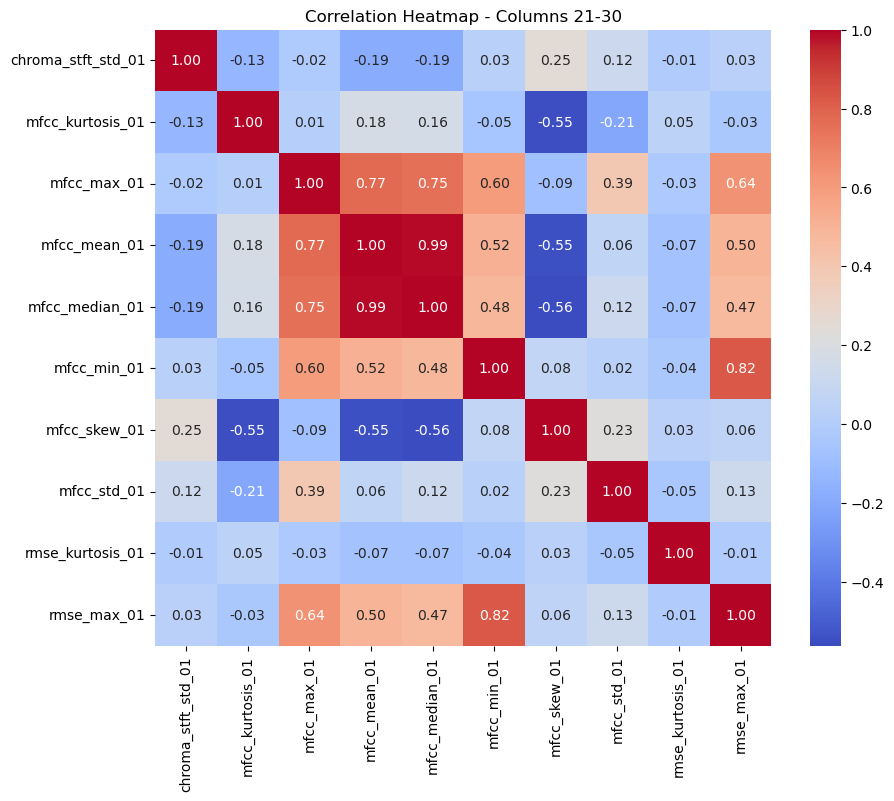

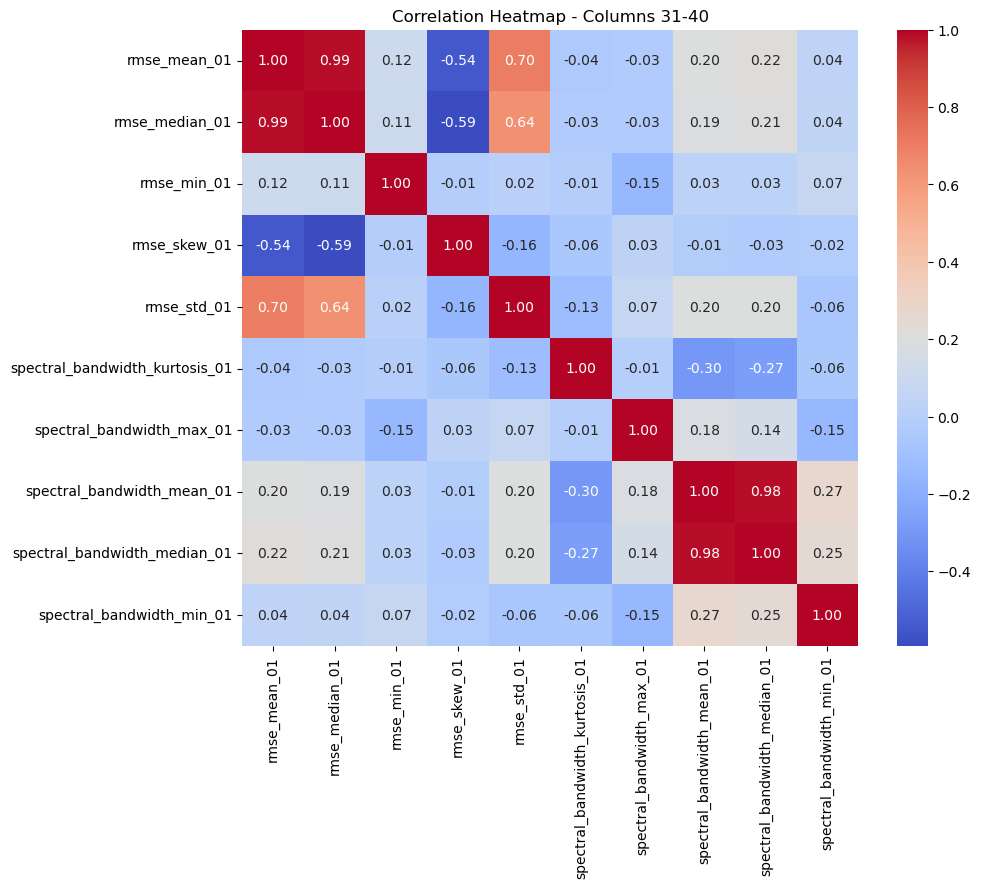

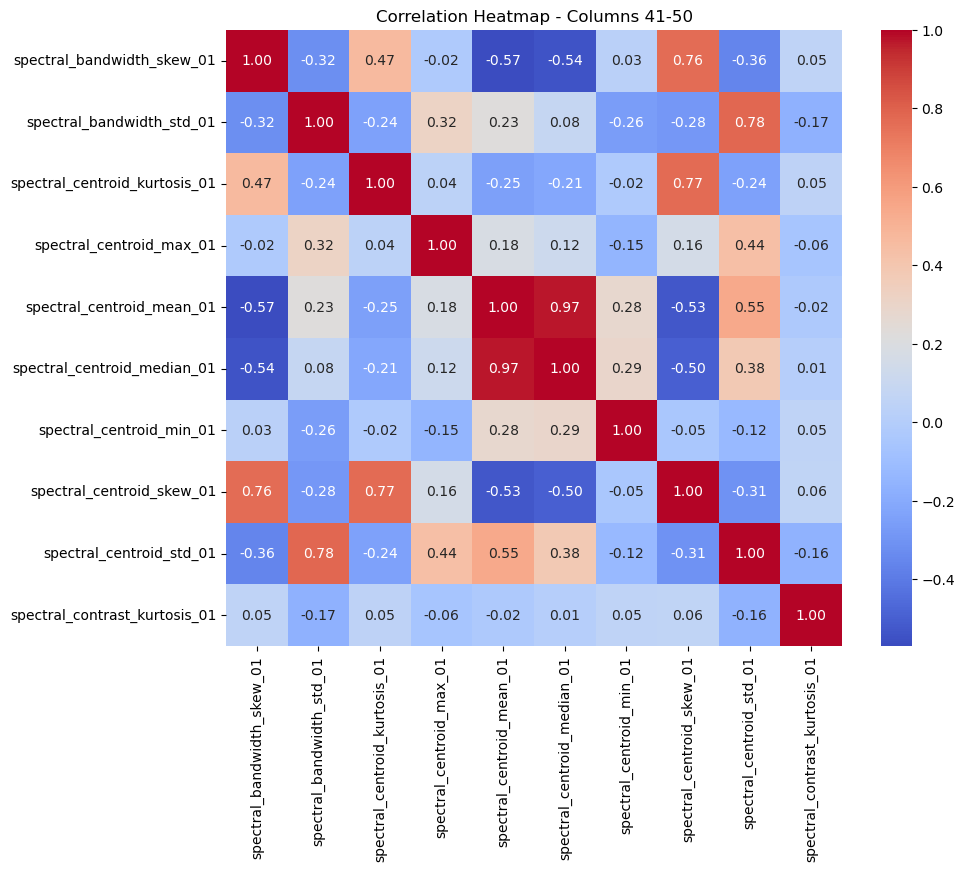

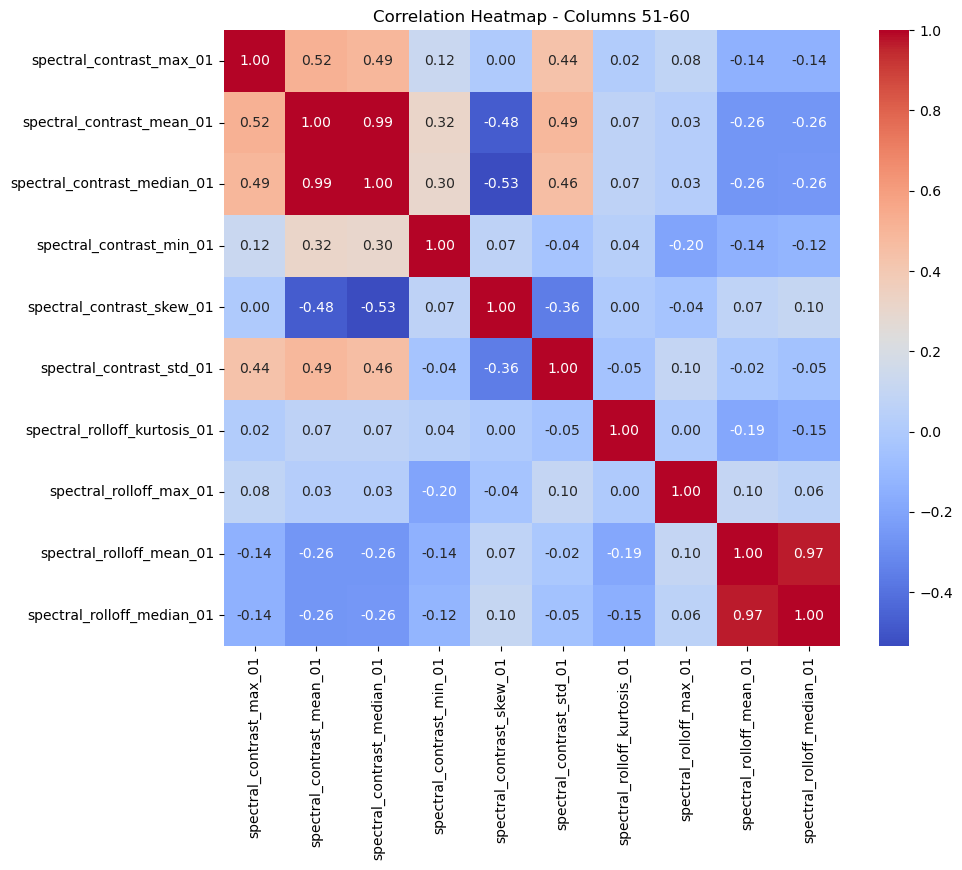

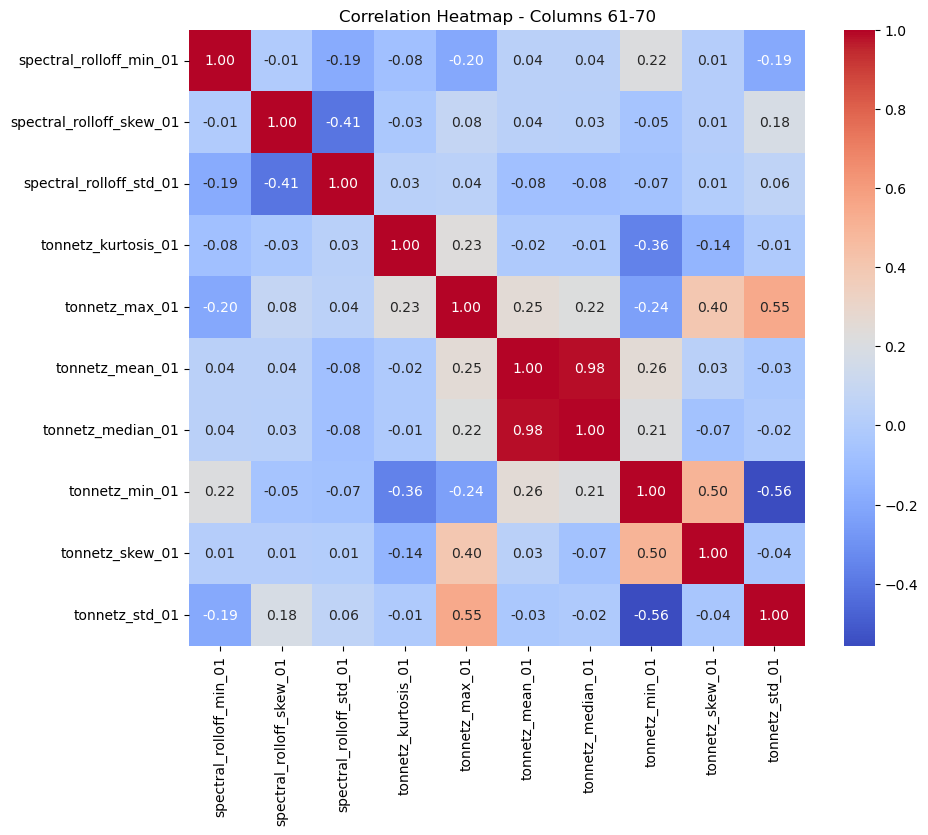

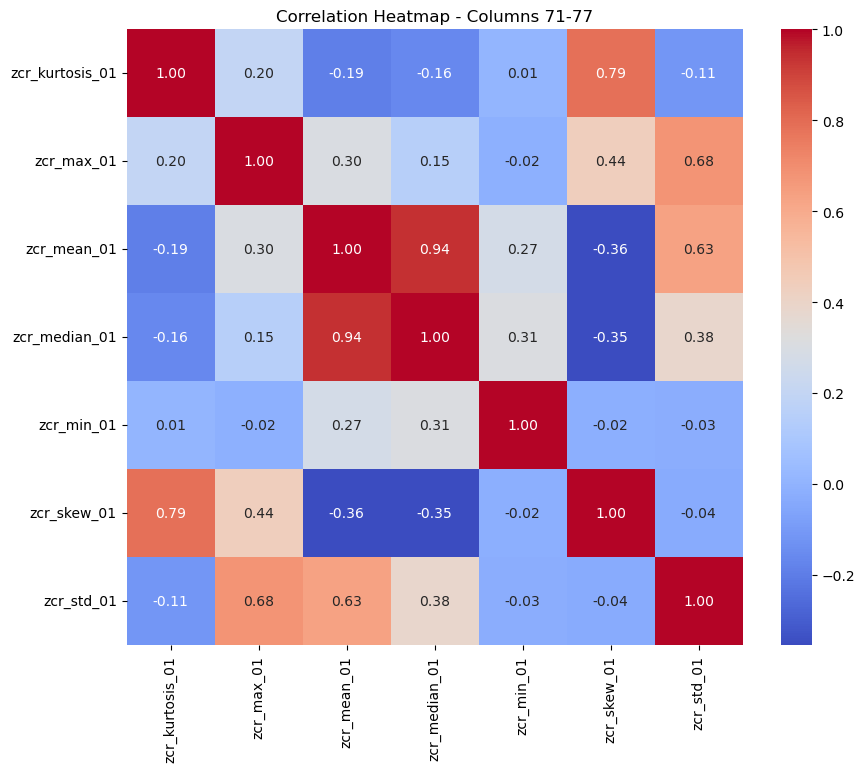

In [13]:
import seaborn as sns

# Calculate the number of heatmaps needed
num_heatmaps = (num_cols + 9) // 10  # Ceiling division to ensure enough heatmaps

# Create heatmaps for each batch of 10 columns
for i in range(num_heatmaps):
    start_idx = i * 10
    end_idx = min((i + 1) * 10, num_cols)
    
    # Extract the subset of columns for this heatmap
    subset_heatmap_df = subset_df.iloc[:, start_idx:end_idx]
    
    # Compute the correlation matrix for this subset
    corr_matrix = subset_heatmap_df.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title(f'Correlation Heatmap - Columns {start_idx+1}-{end_idx}')
    plt.show()


In [14]:
# Initialize dictionaries to store results
outliers_percentage = {}
extreme_outliers_percentage = {}

# Loop through each column
for col in subset_df.columns:
    # Calculate quartiles
    Q1 = subset_df[col].quantile(0.25)
    Q3 = subset_df[col].quantile(0.75)
    
    # Calculate interquartile range
    IQR = Q3 - Q1
    
    # Calculate boundaries for outliers and extreme outliers
    lower_bound_outliers = Q1 - 1.5 * IQR
    upper_bound_outliers = Q3 + 1.5 * IQR
    
    lower_bound_extreme = Q1 - 3 * IQR
    upper_bound_extreme = Q3 + 3 * IQR
    
    # Identify outliers and extreme outliers
    outliers = subset_df[(subset_df[col] < lower_bound_outliers) | (subset_df[col] > upper_bound_outliers)]
    extreme_outliers = subset_df[(subset_df[col] < lower_bound_extreme) | (subset_df[col] > upper_bound_extreme)]
    
    # Calculate percentages
    total_values = len(subset_df[col])
    percentage_outliers = len(outliers) / total_values * 100
    percentage_extreme_outliers = len(extreme_outliers) / total_values * 100
    
    # Store percentages in dictionaries
    outliers_percentage[col] = percentage_outliers
    extreme_outliers_percentage[col] = percentage_extreme_outliers

# Print table
print("Column\t\t% Outliers\t\t% Extreme Outliers")
for col in subset_df.columns:
    print(f"{col}\t\t{outliers_percentage[col]:.2f}%\t\t\t{extreme_outliers_percentage[col]:.2f}%")


Column		% Outliers		% Extreme Outliers
chroma_cens_kurtosis_01		5.85%			2.25%
chroma_cens_max_01		1.42%			0.05%
chroma_cens_mean_01		2.81%			0.17%
chroma_cens_median_01		6.23%			0.41%
chroma_cens_min_01		21.91%			21.91%
chroma_cens_skew_01		3.77%			0.65%
chroma_cens_std_01		1.17%			0.01%
chroma_cqt_kurtosis_01		7.69%			3.64%
chroma_cqt_max_01		0.22%			0.22%
chroma_cqt_mean_01		1.25%			0.00%
chroma_cqt_median_01		2.45%			0.00%
chroma_cqt_min_01		4.85%			1.37%
chroma_cqt_skew_01		4.23%			0.83%
chroma_cqt_std_01		1.38%			0.04%
chroma_stft_kurtosis_01		7.69%			3.37%
chroma_stft_max_01		0.15%			0.15%
chroma_stft_mean_01		1.08%			0.00%
chroma_stft_median_01		1.62%			0.00%
chroma_stft_min_01		11.98%			7.06%
chroma_stft_skew_01		3.27%			0.42%
chroma_stft_std_01		1.97%			0.09%
mfcc_kurtosis_01		8.16%			3.42%
mfcc_max_01		3.27%			0.29%
mfcc_mean_01		1.25%			0.06%
mfcc_median_01		1.21%			0.06%
mfcc_min_01		3.41%			0.62%
mfcc_skew_01		2.95%			0.39%
mfcc_std_01		1.44%			0.10%
rmse_kurtosis_01		7.96